## A simple example to run a Support Vector Machine Classifier on synthetic data

Given that Support Vector Machines (SVM) represent the first more complex machine learning technique we will apply it to a synthetic dataset before we explore a realistic dataset in the next practical. Working with synthetic data first has the advantage that we can control all aspects of the data and understand the algorithm before we encounter the complexities of real data and their imperfections.

As a first step we import the necessary python modules: sklearn for the svm and a convenient function to create synthetic data, numpy for storing arrays and matplotlib for plotting the data.

In [35]:
from sklearn import svm
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

### Support Vector Machine Classification

We start by using the SVM classification, i.e. each datapoint is associated with a discrete class that can be represented by an integer. We create synthetic data using the *make_blobs* function. Find the documentation for the make_blobs function and look up the different parameters. What is the implication of the argument *random_state=0*? When is this an advantage and what problems can arise from such an approach?

In [36]:
X, y = make_blobs(n_samples=200, centers=2, n_features=2,
                   random_state=0, cluster_std= 1.0)

In [37]:
#make_blobs?

We plot the coordinates of each point and colour them by their class association.

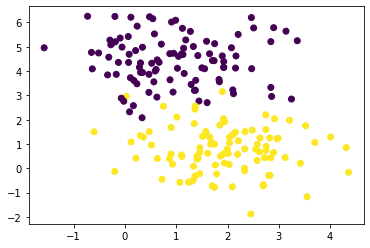

In [38]:
plt.scatter(X[:,0],X[:,1],c=y)

The scikit-learn package provides a consistent interface to many machine learning methods. Typically this involves two steps for the training:
- Creating an object for the chosen method, here linear Support Vector Classification
- Call the fit function for the given inputs (X) and outputs (y)

In [39]:
s = svm.LinearSVC(loss='hinge',C=0.01,max_iter=10000)
s.fit(X,y)

LinearSVC(C=0.01, loss='hinge', max_iter=10000)

To get the solution, i.e. the predicted class for each point, we call the function *predict*. We can then plot the expected classification predicted by the SVM.

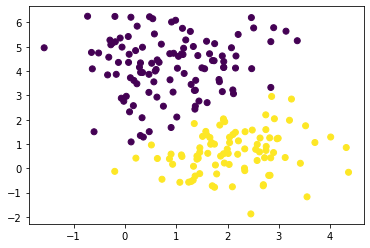

In [40]:
sol = s.predict(X)
plt.scatter(X[:,0], X[:,1], c=sol)

To compare with the actual results it is easier to plot the decision boundary together with the real associations. To plot the decision boundary we solve for the line where the hyper plane solutions cuts zero. Compare with equations (1) and (2) from the lecture.

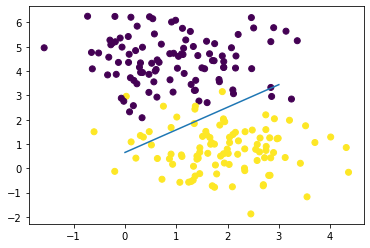

In [41]:
xpred = np.linspace(0,3,100) # array of values which are plotted
w = s.coef_[0] 
b = s.intercept_[0]
decision_boundary = -w[0]/w[1] * xpred - b/w[1] # Hyperplane is reduced to line (intersect of hyperplane with zero)
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(xpred,decision_boundary)

### Tasks
<ol>
<li>Increase the standard deviation in the make_blobs function. What happens to the plots?</li>
    
    - Points are distributed more random
    
    - More difficult to clearly seperate purple from yellow dots
    
<li>Investigate the impact of the regularization parameter C on the results.</li>
    
    - Increase of C might lead to convergence problem due to non-linear optimization problem
    
    - Potentially provides wrong results (flattens boundary line)
    
    - Really small C results in wider margin and minimizes *w* (slope) 
    [-> not caring about boundary violations]
</ol>

## Support Vector Machine Regression

We can also use a SVM for regression as discussed in the lecture. We first import the appropriate module from scikit-learn and create synthetic line data with random noise.

In [42]:
from sklearn.svm import LinearSVR
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

As before solving the machine learning problem with sklearn involves constructing an object (here of type LinearSVR) and calling the fit method with the inputs and outputs.

In [43]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

As before we can calculate the prediction at a set of values through the predict function.

In [44]:
x1s = np.linspace(np.min(X), np.max(X), 100).reshape(100, 1)
y_pred = svm_reg.predict(x1s)

We can plot the datapoints against the prediction.

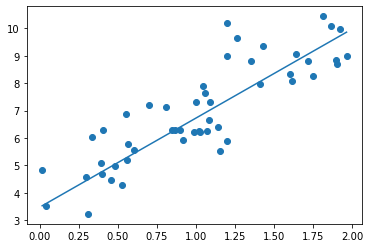

In [45]:
plt.figure()
plt.scatter(X,y)
plt.plot(x1s,y_pred)

### Tasks
<ol>
<li>Use the code for least squares fitting of a line from the last practical to plot a comparison.</li>
<li>Investigate the impact of the parameters C and $\epsilon$ on the results.</li>
<li>Add outliers to the data and investigate what happens.</li>
</ol>